# **Parte 4 - SciPy**

## **¿Qué es SciPy?**



*   Conjunto de paquetes para computación cientifica general.
*   Integración, optimización, interpolación, procesamiento de señales digitales, estadísticas.
*   Normalmente interfaces a programas muy utilizados escritos en Fortran o C++.



In [1]:
%matplotlib inline

In [2]:
import numpy as np
import matplotlib.pyplot as plt

In [3]:
from scipy import integrate

**Integración numérica**

In [ ]:
%%latex
$$f(x) = Ae^{-x^2}$$

<IPython.core.display.Latex object>

In [ ]:
def f(x, A=1):
    return A * np.exp(-x ** 2)

In [ ]:
integrate.quad(f, 0, 5, args=1.0)

(0.8862269254513955, 2.3183115159980698e-14)

**Ecuaciones diferenciales ordinarias (EDOs)**

In [ ]:
%%latex
$ {y}'+ y = 0 $
$$ {y}' = f(y) $$

<IPython.core.display.Latex object>

In [ ]:
def f(y, t):
    return -y

In [ ]:
y0 = 1.0
t = np.linspace(0, 3)

In [ ]:
sol = integrate.odeint(f, y0, t)

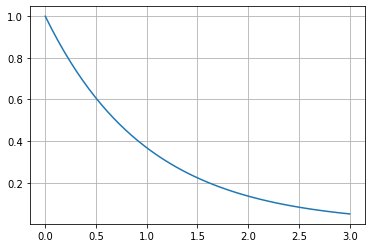

In [ ]:
plt.plot(t, sol)
plt.grid()

In [ ]:
%%latex
${y}'' + y = 0 $

<IPython.core.display.Latex object>

<a href="https://www.codecogs.com/eqnedit.php?latex=f(y)&space;=&space;\binom{y}{y^{'}}^{'}=\binom{y^{'}}{y^{''}}=\binom{y^{'}}{-y^{'}}" target="_blank"><img src="https://latex.codecogs.com/gif.latex?f(y)&space;=&space;\binom{y}{y^{'}}^{'}=\binom{y^{'}}{y^{''}}=\binom{y^{'}}{-y^{'}}" title="f(y) = \binom{y}{y^{'}}^{'}=\binom{y^{'}}{y^{''}}=\binom{y^{'}}{-y^{'}}" /></a>

In [5]:
def f(y, t):
    return np.array([y[1], -y[0]])

In [6]:
t = np.linspace(0, 10)

In [7]:
y0 = np.array([1.0, 0.0])

In [10]:
sol =integrate.odeint(f, y0, t)

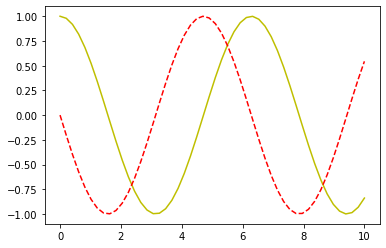

In [16]:
plt.plot(t, sol[:, 0],'y')
plt.plot(t, sol[:, 1], 'r--')

**Ecuaciones algebraicas no lineales**

In [17]:
from scipy import optimize

In [30]:
%%latex 
$$M = E - e \sin E 
\\[10pt]
F(E) = E - e \sin E - M 
$$

<IPython.core.display.Latex object>

In [31]:
def F(E, e, M):
    return E - e * np.sin(E) - M

In [36]:
sol = optimize.root(F, 0.1,args=(0.016, 0.1))
sol.x

array([0.10162317])

**Ajuste e interpolación**


In [38]:
from scipy import interpolate

In [39]:
from scipy.interpolate import barycentric_interpolate
def runge(x):
    """Función de runge"""
    return 1 / (1 + x ** 2)

In [40]:
N = 11 #Nodos de interpolación
xp = np.arange(11) - 5 # -5, -4, -3, ...., 3, 4, 5,
fp = runge(xp)

x = np.linspace(-5, 5, num=1000)
y = barycentric_interpolate(xp, fp, x)

In [42]:
%matplotlib inline

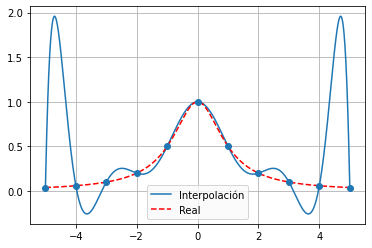

In [52]:
l, = plt.plot(x, y)
plt.plot(x, runge(x), 'r--')
plt.plot(xp, fp,'o', c=l.get_color())
plt.grid()
leg =  plt.legend(['Interpolación','Real'])
leg.get_frame().set_facecolor('#fafafa')